# Pandas
## Introduction
Pandas contains high-level data structures, and manipulation tools designed to make data analysis fast and easy. 

## Data structure
Pandas has two workhorse data structures, Series and DataFrame. 

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

### Series
A Series is a one-dimensional array-like object containing an array of data, and associated array of data labels, so called index.

In [4]:
obj = Series([4, 7, -5, 3])
print obj

0    4
1    7
2   -5
3    3
dtype: int64


In [6]:
print obj.values
print obj.index

[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


In [7]:
obj2 = Series([4, 7, -5, 3], index=['a', 'c', 'b', 'd'])
print obj2

a    4
c    7
b   -5
d    3
dtype: int64


In [9]:
print obj2['a']
print obj2[['a', 'b', 'c']]

4
a    4
b   -5
c    7
dtype: int64


In [13]:
print '1', obj2[obj2 > 0]
print '2', obj2 * 2
print '3', np.exp(obj2)

1 a    4
c    7
d    3
dtype: int64
2 a     8
c    14
b   -10
d     6
dtype: int64
3 a      54.598150
c    1096.633158
b       0.006738
d      20.085537
dtype: float64


In [14]:
print obj2.a
print 'a' in obj2

4
True


In [18]:
sdata = {'Ohio': [35000, 23], 'Texas': [71000, 30], 'Oregon': [16000, 4], 'Utah': [5000, 50]}
obj3 = Series(sdata)
print obj3

Ohio      [35000, 23]
Oregon     [16000, 4]
Texas     [71000, 30]
Utah       [5000, 50]
dtype: object


In [23]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)
print obj4.Ohio[0]

35000


In [26]:
print pd.isnull(obj4)
print pd.notnull(obj4)
print obj4.isnull(), obj4.notnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool


In [27]:
obj5 = obj3 + obj4
print obj5

California                       NaN
Ohio          [35000, 23, 35000, 23]
Oregon          [16000, 4, 16000, 4]
Texas         [71000, 30, 71000, 30]
dtype: object


### DataFrame

In [30]:
df1 = DataFrame(sdata)
print df1

    Ohio  Oregon  Texas  Utah
0  35000   16000  71000  5000
1     23       4     30    50


In [31]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 'year': [2000, 2001, 2002, 2001, 2002], 'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)
print frame

   pop   state  year
0  1.5    Ohio  2000
1  1.7    Ohio  2001
2  3.6    Ohio  2002
3  2.4  Nevada  2001
4  2.9  Nevada  2002


In [32]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five'])
print frame2

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN


In [33]:
frame2.debt = 1.6
print frame2

       year   state  pop  debt
one    2000    Ohio  1.5   1.6
two    2001    Ohio  1.7   1.6
three  2002    Ohio  3.6   1.6
four   2001  Nevada  2.4   1.6
five   2002  Nevada  2.9   1.6


In [34]:
frame2.debt = np.arange(5)
print frame2

       year   state  pop  debt
one    2000    Ohio  1.5     0
two    2001    Ohio  1.7     1
three  2002    Ohio  3.6     2
four   2001  Nevada  2.4     3
five   2002  Nevada  2.9     4


In [39]:
frame2.T.one

year     2000
state    Ohio
pop       1.5
debt        0
Name: one, dtype: object

## Essential Functionality
### Reindexing
Reindexing means to create a new object with the data conformed to a new index

In [41]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
print obj
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
print obj2
obj3 = obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)
print obj3

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64
a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64


In [42]:
obj4 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
print obj4.reindex(range(6), method='ffill')
print obj4.reindex(range(6), method='pad')
print obj4.reindex(range(6), method='bfill')
print obj4.reindex(range(6), method='backfill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object
0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object
0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object
0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object


DataFrame, columns also can be reindexed

In [4]:
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])
print frame
states = ['Ohio', 'Utah', 'Texas', 'California']
print frame.reindex(columns=states)

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8
   Ohio  Utah  Texas  California
a     0   NaN      1           2
c     3   NaN      4           5
d     6   NaN      7           8


In [45]:
frame.ix[:, 'Texas']

a    1
c    4
d    7
Name: Texas, dtype: int64

### Dropping entries from an axis

In [47]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
print obj.drop('c')
print obj.drop(['a', 'c'])

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64
b    1.0
d    3.0
e    4.0
dtype: float64


In [60]:
data = DataFrame(np.arange(16).reshape((4, 4)), index=['Ohio', 'Colorado', 'Utah', 'New York'], columns=['one', 'two', 'three', 'four'])

print data.drop('Ohio')
print data.drop('one', axis=1)

          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
          two  three  four
Ohio        1      2     3
Colorado    5      6     7
Utah        9     10    11
New York   13     14    15


### Indexing, selection, and filtering

In [62]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
print obj['b']
print obj[2:4]
print obj[obj < 2]
print obj['b':'c']

1.0
c    2.0
d    3.0
dtype: float64
a    0.0
b    1.0
dtype: float64
b    1.0
c    2.0
dtype: float64


### Arithmetic methods with fill values

In [3]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
print df1, df2

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0       a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [16]:
print (df1 + df2).dropna(axis=0, how='all').dropna(axis=1, how='all')

      a     b     c     d
0   0.0   2.0   4.0   6.0
1   9.0  11.0  13.0  15.0
2  18.0  20.0  22.0  24.0


In [18]:
print df1.ix[:,0]

0    0.0
1    4.0
2    8.0
Name: a, dtype: float64


### Function application and mapping

In [23]:
f = lambda x: (x - x.mean()) / (x.std())
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print frame
print frame.apply(f)  # apply function 

               b         d         e
Utah    1.155546 -0.264290 -2.136822
Ohio   -0.748567 -1.132204  0.120090
Texas  -0.111359 -0.070171 -1.772847
Oregon  0.751219  1.720155 -0.033606
               b         d         e
Utah    1.044155 -0.273701 -1.013920
Ohio   -1.180178 -0.998683  0.923657
Texas  -0.435809 -0.111551 -0.701444
Oregon  0.571831  1.383935  0.791708


In [25]:
# Element-wise python function: applymap
format = lambda x: '%.2f' % x
print frame.applymap(format)
# Series has a map function for applying element-wise function
print frame.e.map(format)

            b      d      e
Utah     1.16  -0.26  -2.14
Ohio    -0.75  -1.13   0.12
Texas   -0.11  -0.07  -1.77
Oregon   0.75   1.72  -0.03
Utah      -2.14
Ohio       0.12
Texas     -1.77
Oregon    -0.03
Name: e, dtype: object


### Sorting and ranking

In [32]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
print obj.sort_index()
print obj.sort_values(ascending=False).index

a    1
b    2
c    3
d    0
dtype: int64
c    3
b    2
a    1
d    0
dtype: int64


In [27]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'], columns=['d', 'a', 'b', 'c'])
print frame.sort_index(axis=1)

       a  b  c  d
three  1  2  3  0
one    5  6  7  4


In [35]:
# ranking, assigning ranks from one through the number of valid data points in an array
obj = Series([7, -5, 7, 4, 2, 0, 4])
print obj.rank(ascending=False)

0    1.5
1    7.0
2    1.5
3    3.5
4    5.0
5    6.0
6    3.5
dtype: float64


## Summarzing and Computing Descriptive Statistics

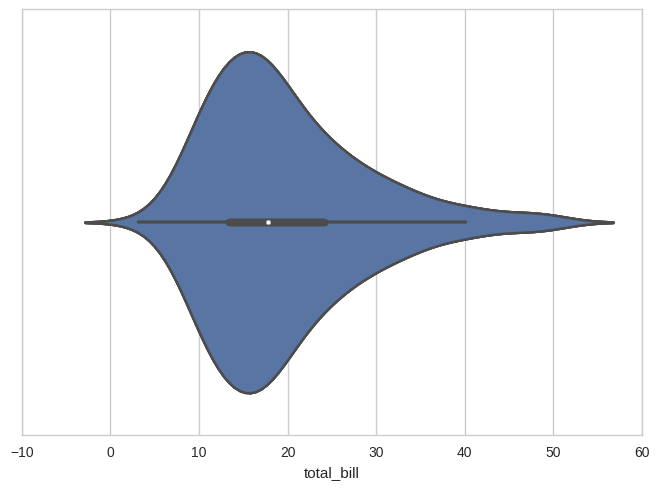

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.violinplot(x=tips["total_bill"])
plt.show()

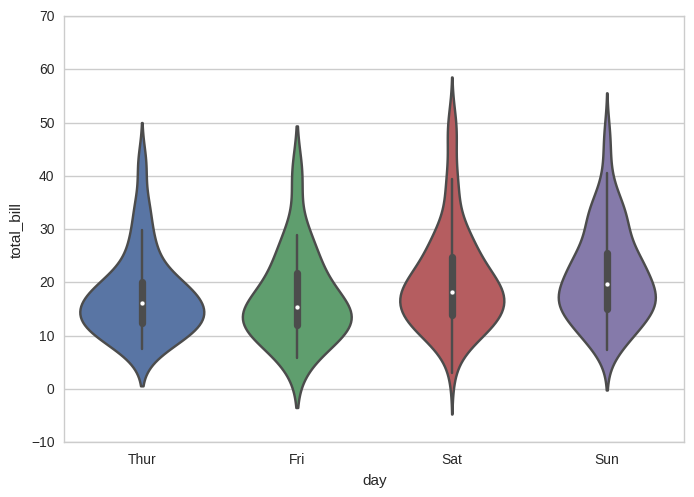

In [43]:
ax = sns.violinplot(x="day", y="total_bill", data=tips)
plt.show()

In [6]:
fn = '../mtdnn/data/all_data_X.csv'
features = pd.read_csv(fn, sep='\t', header=0, index_col=0)

In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23595 entries, "A0A024R214" to "X6RKN2"
Columns: 258 entries, "CC.coil_S1" to "SP.signal"
dtypes: float64(258)
memory usage: 46.6+ MB


In [8]:
features.describe()

,"""CC.coil_S1""","""CC.coil_S2""","""CC.coil_S3""","""CC.coil_S4""","""CC.coil_S5""","""CC.coil_S6""","""CC.coil_S7""","""CC.coil_S8""","""CC.coil_cterm""","""CC.coil_nterm""",...,"""SF.surf""","""SF.vol""","""SP.maxC""","""SP.maxCpos""","""SP.maxS""","""SP.maxSpos""","""SP.maxY""","""SP.maxYpos""","""SP.meanS""","""SP.signal"""
count,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000,...,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000,23595.000000
mean,0.013251,0.017389,0.019896,0.020248,0.018676,0.020154,0.019953,0.019368,0.010405,0.006027,...,0.855551,0.850741,0.211241,0.818237,0.329339,0.559965,0.228456,0.681864,0.265542,0.157491
std,0.086535,0.100258,0.106815,0.108617,0.103009,0.109986,0.109073,0.105278,0.084393,0.066447,...,0.061577,0.062587,0.185698,0.099991,0.292662,0.260667,0.210045,0.227507,0.268909,0.364271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.628450,0.631077,0.105000,0.257728,0.101000,0.162608,0.095000,0.162608,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.811477,0.806091,0.111000,0.745553,0.128000,0.325217,0.111000,0.540173,0.103000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.859413,0.854287,0.126000,0.813042,0.176000,0.601722,0.130000,0.745553,0.131000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.899771,0.895245,0.194000,0.898177,0.414000,0.781716,0.212000,0.847100,0.282000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.996704,0.995376,0.924000,1.000000,0.998000,1.000000,0.944000,1.000000,0.991000,1.000000


In [48]:
types = set({})
for c in features.columns:
    tmp = c.split('.')
    types.add(tmp[0])

Index([u'"CC.coil_S1"', u'"CC.coil_S2"', u'"CC.coil_S3"', u'"CC.coil_S4"',
       u'"CC.coil_S5"', u'"CC.coil_S6"', u'"CC.coil_S7"', u'"CC.coil_S8"',
       u'"CC.coil_cterm"', u'"CC.coil_nterm"',
       ...
       u'"SF.surf"', u'"SF.vol"', u'"SP.maxC"', u'"SP.maxCpos"', u'"SP.maxS"',
       u'"SP.maxSpos"', u'"SP.maxY"', u'"SP.maxYpos"', u'"SP.meanS"',
       u'"SP.signal"'],
      dtype='object', length=258)


In [52]:
atype = []
for c in features.columns:
    tmp = c.split('.')
    if tmp[0] == list(types)[0]:
        atype.append(c)
ax = sns.violinplot(data=features[atype])
plt.show()

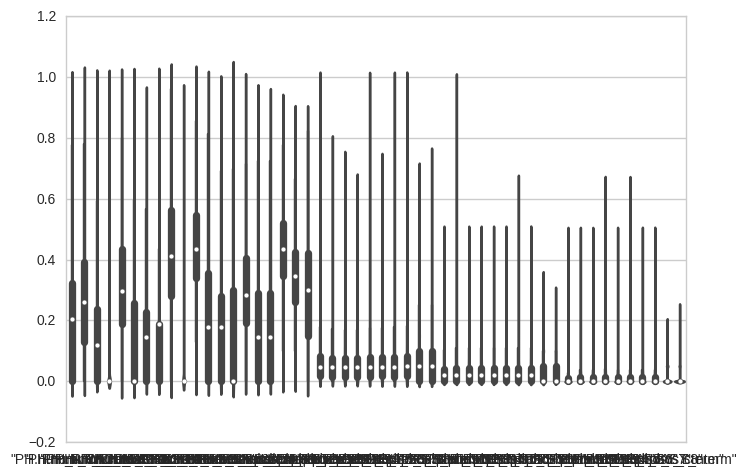

In [61]:
atype = []
for c in features.columns:
    tmp = c.split('.')
    if tmp[0] == list(types)[1]:
        atype.append(c)
ax = sns.violinplot(data=features[atype])
plt.show()

In [69]:
d = features[atype]
d.mad()

"TM.glob.tm"       0.411246
"TM.in.out"        0.171635
"TM.num_re_hel"    0.001974
"TM.num_tm_hel"    0.483340
"TM.num_tm_res"    0.252659
"TM.tm_S1"         0.112143
"TM.tm_S2"         0.103799
"TM.tm_S3"         0.116914
"TM.tm_S4"         0.109826
"TM.tm_S5"         0.105671
"TM.tm_S6"         0.121651
"TM.tm_S7"         0.114468
"TM.tm_S8"         0.099735
"TM.tm_cterm"      0.059995
"TM.tm_nterm"      0.046299
dtype: float64

In [80]:
import pandas_datareader.data as web
all_data = {}
for ticker in ['AAPL', 'MSFT', 'BARC.L']:
    all_data[ticker] = web.get_data_google(ticker, '1/1/2000', '1/1/2010')
price = DataFrame({tic: data['Close'] for tic, data in all_data.iteritems()})
volume = DataFrame({tic: data['Volume'] for tic, data in all_data.iteritems()})
print price
print volume

             AAPL  BARC.L   MSFT
Date                            
2000-01-03   4.00     NaN  58.34
2000-01-04   3.66  422.32  56.31
2000-01-05   3.71  408.00  56.91
2000-01-06   3.39  395.21  55.00
2000-01-07   3.54  383.85  55.72
2000-01-10   3.49  394.04  56.12
2000-01-11   3.31  377.04  54.69
2000-01-12   3.11  387.60  52.91
2000-01-13   3.46  400.34  53.91
2000-01-14   3.59  389.46  56.12
2000-01-17    NaN  369.76    NaN
2000-01-18   3.71  373.32  57.66
2000-01-19   3.81  350.37  53.50
2000-01-20   4.05  337.78  53.00
2000-01-21   3.98  351.46  51.88
2000-01-24   3.79  367.96  50.62
2000-01-25   4.01  347.25  51.41
2000-01-26   3.94  372.00  49.69
2000-01-27   3.93  380.18  49.38
2000-01-28   3.63  382.00  49.12
2000-01-31   3.71  373.13  48.94
2000-02-01   3.58  372.60  51.47
2000-02-02   3.53  368.97  50.41
2000-02-03   3.69  369.21  51.81
2000-02-04   3.86  346.00  53.28
2000-02-07   4.07  355.46  53.31
2000-02-08   4.10  363.40  54.97
2000-02-09   4.02  361.21  52.00
2000-02-10

In [86]:
returns = price.dropna(axis=0).pct_change()
print returns.corr()

            AAPL    BARC.L      MSFT
AAPL    1.000000  0.101558  0.411864
BARC.L  0.101558  1.000000  0.162153
MSFT    0.411864  0.162153  1.000000


In [87]:
print d.corr()

                 "TM.glob.tm"  "TM.in.out"  "TM.num_re_hel"  "TM.num_tm_hel"  \
"TM.glob.tm"         1.000000     0.255239         0.103454         0.858516   
"TM.in.out"          0.255239     1.000000        -0.030723         0.114264   
"TM.num_re_hel"      0.103454    -0.030723         1.000000         0.136935   
"TM.num_tm_hel"      0.858516     0.114264         0.136935         1.000000   
"TM.num_tm_res"      0.962498     0.190278         0.126395         0.962999   
"TM.tm_S1"           0.545657     0.019936         0.064424         0.634294   
"TM.tm_S2"           0.494251     0.047922         0.093351         0.645423   
"TM.tm_S3"           0.523275    -0.009633         0.070086         0.699589   
"TM.tm_S4"           0.534478    -0.018870         0.117782         0.699231   
"TM.tm_S5"           0.524776     0.021814         0.113798         0.677110   
"TM.tm_S6"           0.543928    -0.009111         0.060507         0.711591   
"TM.tm_S7"           0.546947     0.0222

## Handling Missing Data
### Filtering out missing data

In [6]:
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])
states = ['Ohio', 'Utah', 'Texas', 'California']
frame = frame.reindex(columns=states)
print frame.dropna(axis=1, how='any')

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8


### Filling in missing data

In [17]:
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])
states = ['Ohio', 'Utah', 'Texas', 'California']
frame = frame.reindex(columns=states)
print frame.fillna(0)
print frame.T.fillna({'a':0.5, 'c':-1}).T
print frame.T.fillna(method='ffill').T
print frame.T.fillna(method='bfill').T

   Ohio  Utah  Texas  California
a     0   0.0      1           2
c     3   0.0      4           5
d     6   0.0      7           8
   Ohio  Utah  Texas  California
a   0.0   0.5    1.0         2.0
c   3.0  -1.0    4.0         5.0
d   6.0   NaN    7.0         8.0
   Ohio  Utah  Texas  California
a   0.0   0.0    1.0         2.0
c   3.0   3.0    4.0         5.0
d   6.0   6.0    7.0         8.0
   Ohio  Utah  Texas  California
a   0.0   1.0    1.0         2.0
c   3.0   4.0    4.0         5.0
d   6.0   7.0    7.0         8.0


## Hierachical indexing

In [19]:
data = Series(np.random.randn(10), index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'], [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
print data

a  1    1.608454
   2   -1.962942
   3   -0.275167
b  1   -0.666931
   2   -0.484398
   3   -1.141910
c  1    0.861093
   2   -0.561365
d  2   -0.593015
   3   -0.555329
dtype: float64


In [27]:
print frame.stack()

a  Ohio          0.0
   Texas         1.0
   California    2.0
c  Ohio          3.0
   Texas         4.0
   California    5.0
d  Ohio          6.0
   Texas         7.0
   California    8.0
dtype: float64


In [2]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1), 'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'], 
                   'd': [0, 1, 2, 0, 1, 2, 3]})
print frame
frame2 = frame.set_index(['c', 'd'])
print frame2
frame2 = frame.set_index(['c', 'd'], drop=False)
print frame2

   a  b    c  d
0  0  7  one  0
1  1  6  one  1
2  2  5  one  2
3  3  4  two  0
4  4  3  two  1
5  5  2  two  2
6  6  1  two  3
       a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1
       a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3


In [4]:
frame2.describe()

,a,b,d
count,7.000000,7.000000,7.000000
mean,3.000000,4.000000,1.285714
std,2.160247,2.160247,1.112697
min,0.000000,1.000000,0.000000
25%,1.500000,2.500000,0.500000
50%,3.000000,4.000000,1.000000
75%,4.500000,5.500000,2.000000
max,6.000000,7.000000,3.000000


In [5]:
frame2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7 entries, (one, 0) to (two, 3)
Data columns (total 4 columns):
a    7 non-null int64
b    7 non-null int64
c    7 non-null object
d    7 non-null int64
dtypes: int64(3), object(1)
memory usage: 280.0+ bytes


### Panel data

In [38]:
import pandas_datareader.data as web
pdata = pd.Panel(dict((stk, web.get_data_google(stk, '1/1/2009', '6/1/2012')) 
                      for stk in ['AAPL', 'BARC.L', 'DELL']))

In [54]:
pdata = pdata.swapaxes('items', 'minor')
stacked = pdata.ix[:, '5/30/2012':'6/30/2012', :].to_frame()

In [51]:
print pdata.ix['Close', '6/1/2012', 'DELL']

12.07


In [55]:
print stacked

                     Open    High     Low   Close       Volume
Date       minor                                              
2012-05-30 AAPL     81.31   82.86   80.94   82.74  132355209.0
           BARC.L  179.70  183.17  174.55  179.45   31505133.0
           DELL     12.59   12.70   12.46   12.56   19787882.0
2012-05-31 AAPL     82.96   83.07   81.64   82.53  122977603.0
           BARC.L  180.70  182.13  174.00  176.30   40800637.0
           DELL     12.53   12.54   12.33   12.33   19955689.0
2012-06-01 AAPL     81.31   81.81   80.07   80.14  130245094.0
           BARC.L  177.75  180.38  170.80  173.50   37842938.0
           DELL     12.15   12.30   12.04   12.07   19397658.0


# A mini tutorial 
## Create DataFrame

In [14]:
import pandas as pd
import numpy as np

# Create a dataframe
data_1 = pd.DataFrame(np.random.rand(6,4), columns=list('ABCD'))
print data_1

# Create a date index
dates = pd.date_range(start='20170101', periods=6)
data_2 = pd.DataFrame(np.random.rand(6,4), index=dates, columns=list('ABCD'))
print data_2

# Create dataframe from a dictionary
data_3 = pd.DataFrame({'A':np.random.randn(3)})
print data_3

# Create dataframe from a dictionary
data_4 = pd.DataFrame({'A':pd.Timestamp('20170101'), 'B':np.random.randn(3)})
print data_4

          A         B         C         D
0  0.434776  0.056210  0.986901  0.361588
1  0.652983  0.281068  0.702196  0.143714
2  0.096195  0.679877  0.395507  0.273588
3  0.999640  0.012918  0.654644  0.324640
4  0.324403  0.433517  0.138114  0.040406
5  0.254693  0.054210  0.031243  0.512224
                   A         B         C         D
2017-01-01  0.251886  0.365267  0.366815  0.797384
2017-01-02  0.699199  0.240852  0.357581  0.783473
2017-01-03  0.282035  0.554356  0.130219  0.914695
2017-01-04  0.837591  0.377526  0.913010  0.671436
2017-01-05  0.040433  0.913141  0.150236  0.950166
2017-01-06  0.500596  0.892298  0.638178  0.361655
          A
0  0.813857
1 -0.546369
2 -0.638997
           A         B
0 2017-01-01  1.463992
1 2017-01-01 -1.039244
2 2017-01-01  0.686649


## Display dataframe

In [15]:
print data_1.dtypes
print data_1
data_1.head(3)
data_1.tail(3)
print data_2.index
print data_2.columns
print data_2.values
data_2.describe()
print data_2.T
print data_2.sort_values(by='B')

A    float64
B    float64
C    float64
D    float64
dtype: object
          A         B         C         D
0  0.434776  0.056210  0.986901  0.361588
1  0.652983  0.281068  0.702196  0.143714
2  0.096195  0.679877  0.395507  0.273588
3  0.999640  0.012918  0.654644  0.324640
4  0.324403  0.433517  0.138114  0.040406
5  0.254693  0.054210  0.031243  0.512224
DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq='D')
Index([u'A', u'B', u'C', u'D'], dtype='object')
[[ 0.25188644  0.36526658  0.36681518  0.79738404]
 [ 0.69919922  0.24085218  0.35758148  0.78347304]
 [ 0.28203509  0.55435599  0.13021908  0.91469453]
 [ 0.837591    0.37752619  0.91300986  0.67143609]
 [ 0.04043275  0.91314149  0.15023585  0.95016559]
 [ 0.50059631  0.89229765  0.6381778   0.36165504]]
   2017-01-01  2017-01-02  2017-01-03  2017-01-04  2017-01-05  2017-01-06
A    0.251886    0.699199    0.282035    0.83759

In [18]:
data_1.astype(np.float32).dtypes

A    float32
B    float32
C    float32
D    float32
dtype: object

## Select data

In [22]:
print '# Select column "A":\n', data_1['A']
print '# Select two rows:\n', data_1[1:3]
print '# Select rows acording to index:\n', data_2['20170102':'20170104']
print '# Select rows acording to index:\n', data_2.loc[dates[0]:dates[2], :]
print '# Select columns:\n', data_2.loc[:, 'B':'D']
print '# Select rows and columns\n', data_2.loc[dates[0]:dates[2], ['B', 'D']]
print '# Select one row:\n', data_2.loc[dates[0]]
print '# Select one element:\n', data_2.loc[dates[0], 'B']
print '# Select one element:\n', data_2.at[dates[0], 'B']
print '# Select one element:\n', data_2.ix[dates[0], 'B']
print '# Select one row:\n', data_2.iloc[3] 
print '# Select rows and cloumns not according to index and columns:\n', data_2.iloc[3:5, 1:3]
print '# Select rows and cloumns: \n', data_2.iloc[[1,2,5], [1,3]]
print '# Select rows: \n', data_2.iloc[1:3, :]
print '# Select one element:\n', data_2.iloc[1,1]
print '# Select one element:\n', data_2.iat[1,1]

# Select column "A":
0    0.434776
1    0.652983
2    0.096195
3    0.999640
4    0.324403
5    0.254693
Name: A, dtype: float64
# Select two rows:
          A         B         C         D
1  0.652983  0.281068  0.702196  0.143714
2  0.096195  0.679877  0.395507  0.273588
# Select rows acording to index:
                   A         B         C         D
2017-01-02  0.699199  0.240852  0.357581  0.783473
2017-01-03  0.282035  0.554356  0.130219  0.914695
2017-01-04  0.837591  0.377526  0.913010  0.671436
# Select rows acording to index:
                   A         B         C         D
2017-01-01  0.251886  0.365267  0.366815  0.797384
2017-01-02  0.699199  0.240852  0.357581  0.783473
2017-01-03  0.282035  0.554356  0.130219  0.914695
# Select columns:
                   B         C         D
2017-01-01  0.365267  0.366815  0.797384
2017-01-02  0.240852  0.357581  0.783473
2017-01-03  0.554356  0.130219  0.914695
2017-01-04  0.377526  0.913010  0.671436
2017-01-05  0.913141  0.15023

## Filter data

In [24]:
print '# Filter data where column D >0: \n', data_2[data_2.D>0.5]
print '# Filter data using &: \n', data_2[(data_2.B>0.5) & (data_2.D<0.5)]
print '# Filter data using |: \n', data_2[(data_2.B>0.5) | (data_2.D<0.5)]
print '# Filter the given columns in data using &: \n', data_2[['A','C']][(data_2.B>0.5) & (data_2.D<0.5)]
values_list = np.random.rand(100)
print '# Filter data using a given list:\n', data_2.D.isin(values_list)

# Filter data where column D >0: 
                   A         B         C         D
2017-01-01  0.251886  0.365267  0.366815  0.797384
2017-01-02  0.699199  0.240852  0.357581  0.783473
2017-01-03  0.282035  0.554356  0.130219  0.914695
2017-01-04  0.837591  0.377526  0.913010  0.671436
2017-01-05  0.040433  0.913141  0.150236  0.950166
# Filter data using &: 
                   A         B         C         D
2017-01-06  0.500596  0.892298  0.638178  0.361655
# Filter data using |: 
                   A         B         C         D
2017-01-03  0.282035  0.554356  0.130219  0.914695
2017-01-05  0.040433  0.913141  0.150236  0.950166
2017-01-06  0.500596  0.892298  0.638178  0.361655
# Filter the given columns in data using &: 
                   A         C
2017-01-06  0.500596  0.638178
# Filter data using a given list:
2017-01-01    False
2017-01-02    False
2017-01-03    False
2017-01-04    False
2017-01-05    False
2017-01-06    False
Freq: D, Name: D, dtype: bool


## Insert and delete data

In [26]:
data_2['E'] = pd.Series(np.random.rand(6), index=dates)
print '# Insert a column called "E": \n', data_2.E
data_2.insert(1, 'a', np.random.rand(6))
print '# Insert a column called "a" at a given position: \n', data_2
del data_2['a']
print '# Delete a column called "a": \n', data_2
data_3 = data_2.drop(['E'], axis=1)
print '# Delete a column called "E": \n', data_3
print '# data_2 did not change: \n', data_2

# Insert a column called "E": 
2017-01-01    0.392935
2017-01-02    0.772244
2017-01-03    0.853136
2017-01-04    0.291227
2017-01-05    0.250760
2017-01-06    0.567391
Freq: D, Name: E, dtype: float64
# Insert a column called "a" at a given position: 
                   A         a         B         C         D         E
2017-01-01  0.251886  0.587031  0.365267  0.366815  0.797384  0.392935
2017-01-02  0.699199  0.561689  0.240852  0.357581  0.783473  0.772244
2017-01-03  0.282035  0.882629  0.554356  0.130219  0.914695  0.853136
2017-01-04  0.837591  0.615141  0.377526  0.913010  0.671436  0.291227
2017-01-05  0.040433  0.967767  0.913141  0.150236  0.950166  0.250760
2017-01-06  0.500596  0.730060  0.892298  0.638178  0.361655  0.567391
# Delete a column called "a": 
                   A         B         C         D         E
2017-01-01  0.251886  0.365267  0.366815  0.797384  0.392935
2017-01-02  0.699199  0.240852  0.357581  0.783473  0.772244
2017-01-03  0.282035  0.554356  0.13

## Counting

In [28]:
fn = '../mtdnn/data/all_data_Y.csv'
labels = pd.read_csv(fn, sep='\t', header=0, index_col=0)
label_count = labels.iloc[:, 0].value_counts()
print label_count

0.0    23218
1.0      377
Name: GO0004984, dtype: int64


## Grouping
need more examples!! agg

In [34]:
group_1 = labels.groupby('GO0004984')
group_1.first().head(3)

,GO0004930,GO0004888,GO0015079,GO0038023,GO0015293,GO0015075,GO0008514,GO0003823,GO0022890,GO0004872,...,GO0010608,GO0051716,GO0045860,GO0007420,GO0007283,GO0033993,GO0043066,GO0007417,GO0071902,GO0040008
GO0004984,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
group_2 = labels.groupby(['GO0004984', 'GO0038023'])
group_2.aggregate(np.sum)

GO0004930  GO0004888  GO0015079  GO0015293  GO0015075  \
GO0004984 GO0038023                                                          
0.0       0.0              0.0        0.0      142.0      158.0      891.0   
          1.0            480.0      883.0       11.0        0.0       86.0   
1.0       1.0            377.0      377.0        0.0        0.0        0.0   

                     GO0008514  GO0003823  GO0022890  GO0004872  GO0008509  \
GO0004984 GO0038023                                                          
0.0       0.0            159.0      177.0      582.0      237.0      292.0   
          1.0              0.0       15.0       20.0      996.0       19.0   
1.0       1.0              0.0        0.0        0.0      377.0        0.0   

                       ...      GO0010608  GO0051716  GO0045860  GO0007420  \
GO0004984 GO0038023    ...                                                   
0.0       0.0          ...          436.0     3875.0      383.0      492.0   
          1.0          ...           10.0      827.0       68.0       75.0   
1.0       1.0          ...            0.0      298.0        0.0        0.0   

                     GO0007283  GO0033993  GO0043066  GO0007417  GO0071902  \
GO0004984 GO0038023                                                          
0.0       0.0            391.0      503.0      672.0      658.0      206.0   
          1.0             22.0      169.0       75.0       91.0       48.0   
1.0       1.0              1.0        1.0        0.0        0.0        0.0   

                     GO0040008  
GO0004984 GO0038023             
0.0       0.0            479.0  
          1.0             52.0  
1.0       1.0              0.0  

[3 rows x 866 columns]

## Dealing with missing values

In [43]:
data_5 = pd.DataFrame(np.random.randn(4,3), index=list('abcd'), columns=list('123'))
data_5.ix[1,:-1] = np.nan
data_5.ix[1:-1,2] = np.nan
print data_5

print '# Fill the missing values with a given value: \n', data_5.fillna(0)
print '# Fill the missing values with a given string: \n', data_5.fillna('missing')
print '# Fill the missing values with the previous value \n', data_5.fillna(method='pad')
print '# Fill the missing values with the next value \n', data_5.fillna(method='bfill')
print '# Fill the missing values with limit \n', data_5.fillna(method='bfill', limit=1)
print '# Fill the missing values with the mean \n', data_5.fillna(data_5.mean())
print '# Fill the missing values in the given columns with the mean \n', data_5.fillna(data_5.mean()['1':'2'])
print '# Interpolate \n', data_5.interpolate()
print '# Drop the missing values horizontally: \n', data_5.dropna(axis=0)
print '# Drop the missing values vertically: \n', data_5.dropna(axis=1)
print '# Replace values\n', data_5.replace({np.nan:1})

          1         2         3
a -0.608639 -0.022846 -0.009094
b       NaN       NaN       NaN
c  1.416742  1.842729       NaN
d -0.661590 -0.144069 -0.823007
# Fill the missing values with a given value: 
          1         2         3
a -0.608639 -0.022846 -0.009094
b  0.000000  0.000000  0.000000
c  1.416742  1.842729  0.000000
d -0.661590 -0.144069 -0.823007
# Fill the missing values with a given string: 
          1          2           3
a -0.608639 -0.0228462 -0.00909372
b   missing    missing     missing
c   1.41674    1.84273     missing
d  -0.66159  -0.144069   -0.823007
# Fill the missing values with the previous value 
          1         2         3
a -0.608639 -0.022846 -0.009094
b -0.608639 -0.022846 -0.009094
c  1.416742  1.842729 -0.009094
d -0.661590 -0.144069 -0.823007
# Fill the missing values with the next value 
          1         2         3
a -0.608639 -0.022846 -0.009094
b  1.416742  1.842729 -0.823007
c  1.416742  1.842729 -0.823007
d -0.661590 -0.144069 -0

## Merging data
merge and concat

In [44]:
data_2['ID'] = [1, 2, 3, 4, 5, 6]
data_5['ID'] = [2,3, 5, 6]
print '# Merge two dataframes based on ID:\n', data_2.merge(data_5, how='right', on='ID')

# Merge two dataframes based on ID:
          A         B         C         D         E  ID         1         2  \
0  0.699199  0.240852  0.357581  0.783473  0.772244   2 -0.608639 -0.022846   
1  0.282035  0.554356  0.130219  0.914695  0.853136   3       NaN       NaN   
2  0.040433  0.913141  0.150236  0.950166  0.250760   5  1.416742  1.842729   
3  0.500596  0.892298  0.638178  0.361655  0.567391   6 -0.661590 -0.144069   

          3  
0 -0.009094  
1       NaN  
2       NaN  
3 -0.823007  


In [54]:
data_6 = data_2.merge(data_5, how='right', on='ID')
data_7 = pd.concat([data_1, data_6], axis=1)
print data_7.A

          A         A
0  0.434776  0.699199
1  0.652983  0.282035
2  0.096195  0.040433
3  0.999640  0.500596
4  0.324403       NaN
5  0.254693       NaN


#### `pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort = False)`

In [156]:
df1 = pd.DataFrame([[1,2],[3,4]], index = ['a','b'],columns = ['A','B'])
df2 = pd.DataFrame([[2,3],[5,8]], index = ['b','d'],columns = ['B','C'])
print df1
print df2

   A  B
a  1  2
b  3  4
   B  C
b  2  3
d  5  8


In [152]:
pd.merge(left=df1, right=df2, how='right', left_index=True, right_index=True)

,A,B_x,B_y,C
b,3.0,4.0,4,3
d,NaN,NaN,5,8


In [144]:
pd.concat([df1,df2], join='inner',axis=1)

,A,B,B,C
b,3,4,4,3


In [161]:
pd.merge(left=df1, right=df2, how='right', on=['B'])

,A,B,C
0,1.0,2.0,3
1,NaN,5.0,8


## Visualising the data

In [57]:
import matplotlib.pyplot as plt
% matplotlib inline

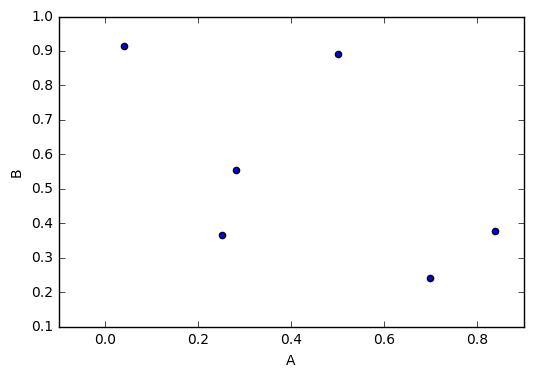

In [58]:
plt = data_2.plot(kind='scatter', x='A', y='B').get_figure()
plt.show()

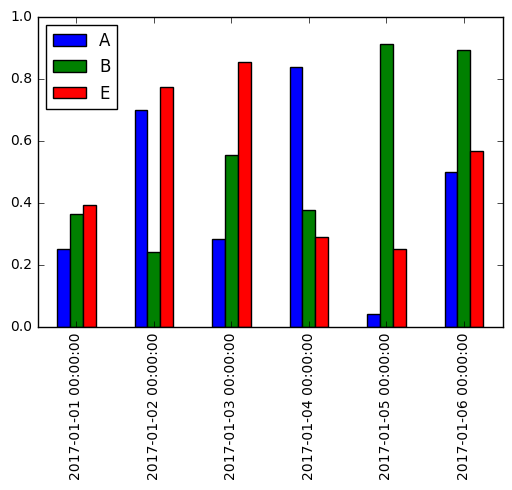

In [62]:
plot = data_2[['A', 'B', 'E']].plot(kind='bar').get_figure()
plt.show()

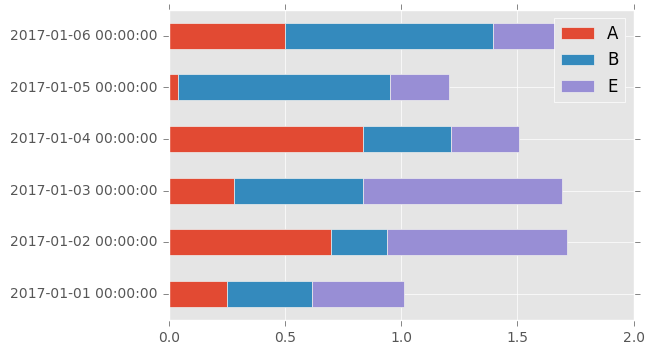

In [70]:
plot = data_2[['A', 'B', 'E']].plot(kind='barh', stacked=True).get_figure()
plt.show()

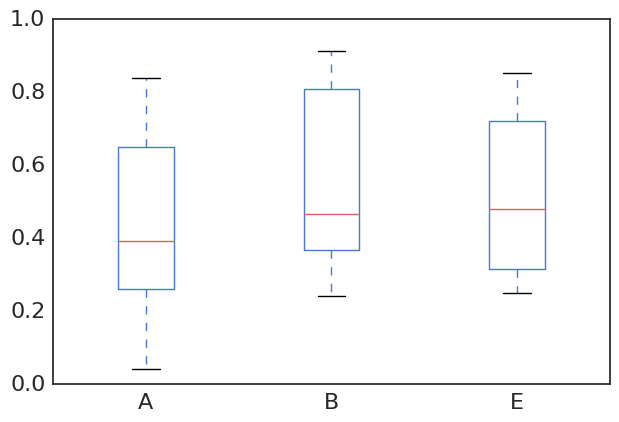

In [103]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn-white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plot = data_2[['A', 'B', 'E']].plot.box()



In [76]:
matplotlib.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

## String operation

In [105]:
s = pd.Series(list('ABCF'))
s.str.lower()

0    a
1    b
2    c
3    f
dtype: object

## Connect Database

In [106]:
from pymongo import MongoClient

In [109]:
def _connect_mongo(host, port, username, password, db):
    """ A util for making a connection to mongo """

    if username and password:
        mongo_uri = 'mongodb://%s:%s@%s:%s/%s' % (username, password, host, port, db)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)


    return conn[db]


def read_mongo(db, collection, query={}, host='localhost', port=27017, username=None, password=None, no_id=True):
    """ Read from Mongo and Store into DataFrame """

    # Connect to MongoDB
    db = _connect_mongo(host=host, port=port, username=username, password=password, db=db)

    # Make a query to the specific DB and Collection
    cursor = db[collection].find(query)

    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(list(cursor))

    # Delete the _id
#     if no_id:
#         del df['_id']

    return df

In [115]:
a = read_mongo('test', 'restaurants')

In [121]:
print a.shape

(76077, 6)


In [122]:
data = [1,2,3]
index = ['a','b','c']
s = pd.Series(data=data, index=index)
s

a    1
b    2
c    3
dtype: int64

In [123]:
s['a'] = 2
s

a    2
b    2
c    3
dtype: int64

In [124]:
s['d'] = 5
s

a    2
b    2
c    3
d    5
dtype: int64

# Examples

In [163]:
import pandas as pd

In [164]:
!head  data/titanic/train.csv

In [168]:
titanic = pd.read_csv('data/titanic/train.csv', header=0, index_col=None)

In [174]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
